<a href="https://colab.research.google.com/github/syamsulmuariff/scrape_twitter/blob/main/snsscrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kita instal dulu snscrape

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


install juga langdetect

In [2]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b894070fd0a16063f2d4c9610c9da180c490868f68587986d52b049ef3d7ed24
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


setelah menginstall kita import library

In [3]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

lalu kita masukkan keyword atau kata kunci yang mau kita cari ditwitter,lalu masukkan start yang isinnya dari tanggal mulai kita mencari kata kunci dan end sampai akhir tanggal pencarian lalu kita masukkan max_num yang artinya maximum banyak jumlah pencarian dan contohnya seperti dibawah ini

In [4]:
keywords=['mobil listrik']
start="2022–09–01"
end ="2022–10–18"
max_num=200
fname='tweet.json' 
languages=['id','en']

setelah mendaptkan kata kunci lalu kita akan melakukan import pandas

In [5]:
import pandas as pd
datatw=[]

lalu kita akan melakukan pencarian ditwitter terkait kata kunci yang kita masukkan dan hasilnya akan ada id,username,tangga tweet,content,tweet url dari pengguna di twitter

In [6]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{'id': 1582217646426058752, 'username': 'Khufragg', 'date': datetime.datetime(2022, 10, 18, 3, 50, 57, tzinfo=datetime.timezone.utc), 'text': 'PLN menyiapkan infrastruktur charging station untuk mobil listrik\n#PLNPimpinTransisiEnergi https://t.co/ecBIwtFms0', 'url': 'https://twitter.com/Khufragg/status/1582217646426058752'}
{"id": 1582217646426058752, "username": "Khufragg", "date": "2022-10-18 03:50:57+00:00", "text": "PLN menyiapkan infrastruktur charging station untuk mobil listrik\n#PLNPimpinTransisiEnergi https://t.co/ecBIwtFms0", "url": "https://twitter.com/Khufragg/status/1582217646426058752"}
{'id': 1582217249301356547, 'username': 'Berita_TU', 'date': datetime.datetime(2022, 10, 18, 3, 49, 23, tzinfo=datetime.timezone.utc), 'text': 'Kaget Lihat Jumlah Mobil Listrik Buatan Indonesia https://t.co/jmZQXC3OrG https://t.co/nOvMxw5UDn', 'url': 'https://twitter.com/Berita_TU/status/1582217249301356547'}
{"id": 1582217249301356547, "username": "Berita_TU", "date": "2022-10-18 03:49:2

kita install sastrawi terlebih dahulu

In [7]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.2 MB/s 


lalu kita import library yaitu import re,string,stemmerfactory,proses ini untuk menghilangkan kata berimbuan menjadi kata dasar

In [8]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

lalu kita tampilkan dokumen dengan documnet_clean

In [9]:
documents_clean

['pln siap infrastruktur charging station mobil listrik plnpimpintransisienergi https t co ecbiwtfms',
 'kaget lihat jumlah mobil listrik buat indonesia https t co jmzqxcorg https t co novmxwudn',
 'sukses selamat apbn subsidi bbm perintah beri atur uu setop produksi mobil konvensional dgn memperoduksi mobil listrik produsen negri jokowi ganjarpranowo astra career kemendag indomobil imfi',
 ' rekomendasi mobil listrik baik ini https t co derdwcpip',
 'bangkitnegeri rantjono rininb ngecharge mobil listrik lebih murah bensin',
 'kaget lihat jumlah mobil listrik buat indonesia https t co tvzpoujdoy',
 'faridaindria dandhy laksono pernah tanjungpinang aku digedor reskrim listrik dimatiin kata mobil dipake curi ponsel padahal mobil punya sirkulasi koran hadeh',
 'mobil listrik jeep avenger mampu tempuh jarak km https t co xjxdojrnb',
 'awat mobil listrik harus paham para milik mobillistrik perawatanmobillistrik inovasielectricvehicle https t co xguxibcts',
 'audi kembang filter udara mobil 

lalu kita akan mengimport tfidfvectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


setelah mendapatkan data dari kata kunci tadi lalu akan dibuat diagram seperti dibawah ini yang menampilkan kata yang terbaik dari 20 besar

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

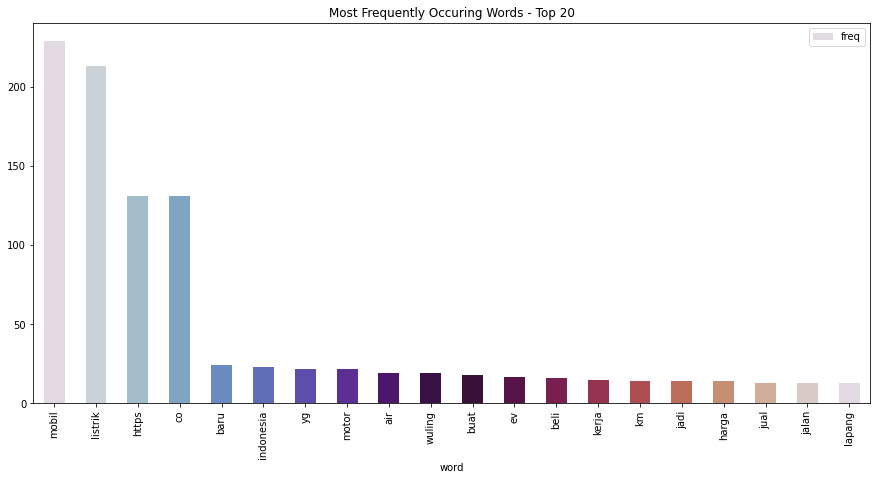

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

setelah mendapatkan kata lalu kita akan melakukkan clustering pada kata tersebut

In [12]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

setelah itu kita akan melihat hasil clustering dibawah ini dengan kata kunci yang kita cari diatas tadi

In [13]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 sob
 oznkdnkg
 https
 google
 kamu
 unipin
 bisa
 untung
 masih
 tinggal
Cluster 1:
 mobil
 listrik
 yg
 aja
 buat
 km
 jadi
 bilang
 macet
 butuh
Cluster 2:
 mobil
 listrik
 https
 co
 motor
 baru
 indonesia
 air
 wuling
 ev




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


setelah melakukan cluster kita bisa juga melakukan prediction kata tersebut masuk ke cluster berapa seperti contoh dibawah ini

In [15]:
print("Prediction")
Y = cv.transform(["mobil listrik"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["wuling"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [1]
Cluster number : [1]


lalu kita buat diagram/dendogram menggunakan method "ward" seperti ini 


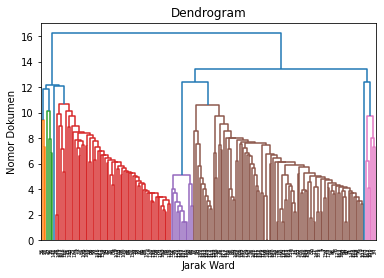

In [16]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

kita juga bisa menggunakan tampilan diagram dendogram menggunakan method average

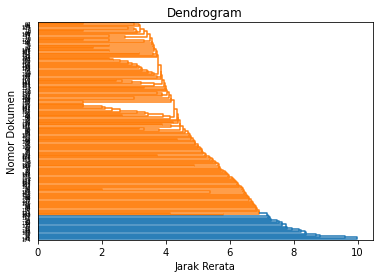

In [17]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[1 1 0 1 0 1 0 1 1 1 2 1 1 1 5 0 0 1 0 0 1 2 0 0 5 0 1 2 0 0 1 1 0 0 2 1 2
 0 1 0 1 1 4 1 0 4 0 2 0 0 1 0 1 1 0 1 1 0 0 0 4 0 0 4 0 0 0 1 0 0 1 1 0 0
 0 2 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 4 1 1 1 0 1 1 0 1 0 5 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 0 1 1 1 0 4 4 1 0 4 1 4 1 1 4 1 1 1 1 1 0 4 4 1 1 0 4 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 5 1 1 5 1 0 1 5 1 1 0 3 1 1 1 0 0 0 0 1 1 1
 0 1 1 0 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


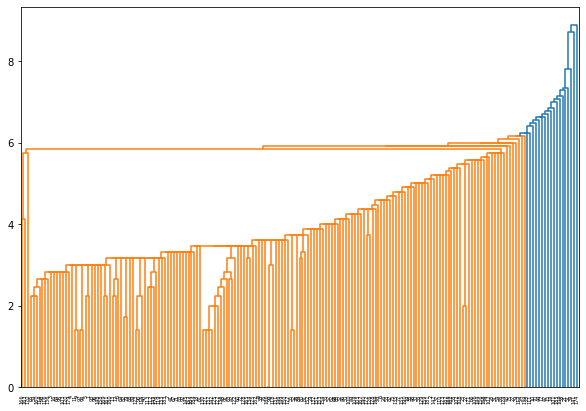

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


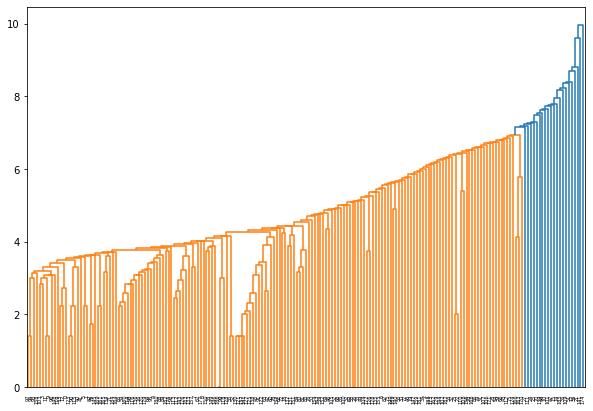

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, len(cluster.labels_))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

https://www.freecodecamp.org/news/python-web-scraping-tutorial/
https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721